In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [4]:
df_train=pd.read_csv("mnist_train.csv")
df_test=pd.read_csv("mnist_test.csv")

In [5]:
X_train=df_train.drop('label',axis=1)
Y_train=df_train['label']

In [6]:
X_test=df_test.drop('label',axis=1)
Y_test=df_test['label']

In [7]:
import time
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

X_red= pca.fit_transform(X_train)
X_red.shape
#PCA to a degree that preserves 95% variance of the data and only losses only 5%.

(60000, 154)

In [ ]:
X_train.shape

(60000, 784)

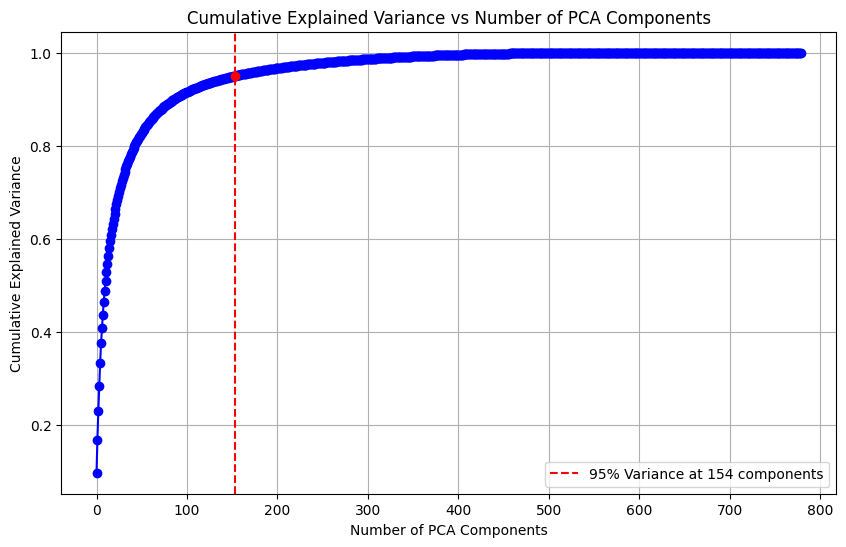

In [ ]:
pca = PCA(n_components=n_components)
pca.fit(X_train)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', color='b')

# Add a vertical line at the point where the cumulative variance reaches 95%
plt.axvline(x=n_components_95 - 1, color='r', linestyle='--', label=f'95% Variance at {n_components_95} components')

# Add marker at 95% variance
plt.scatter(n_components_95 - 1, cumulative_explained_variance[n_components_95 - 1], color='r', zorder=5)

plt.title('Cumulative Explained Variance vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

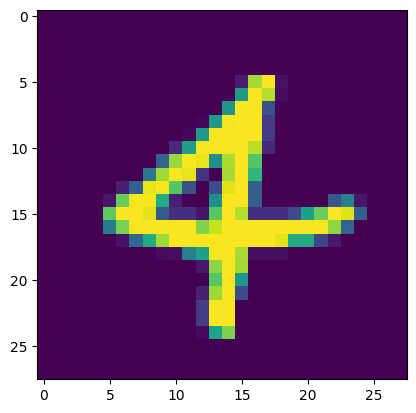

In [ ]:
plt.imshow(X_train.iloc[150].to_numpy().reshape(28,28))

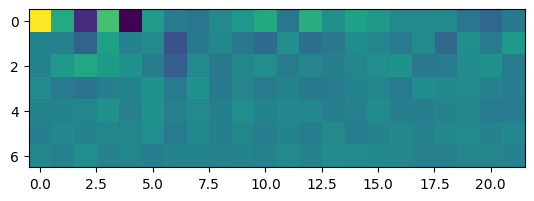

In [ ]:
plt.imshow(X_red[1].reshape(7,22))

In [ ]:
X_return=pca.inverse_transform(X_red)

In [ ]:
X_return.shape

(60000, 784)

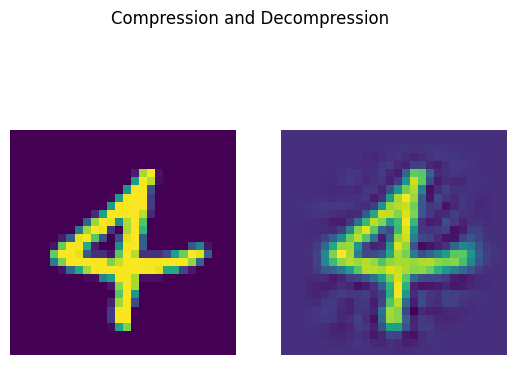

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_train.iloc[150].to_numpy().reshape(28,28))
ax2.imshow(X_return[150].reshape(28, 28))
fig.suptitle('Compression and Decompression')
ax1.axis('off')
ax2.axis('off')
plt.show()

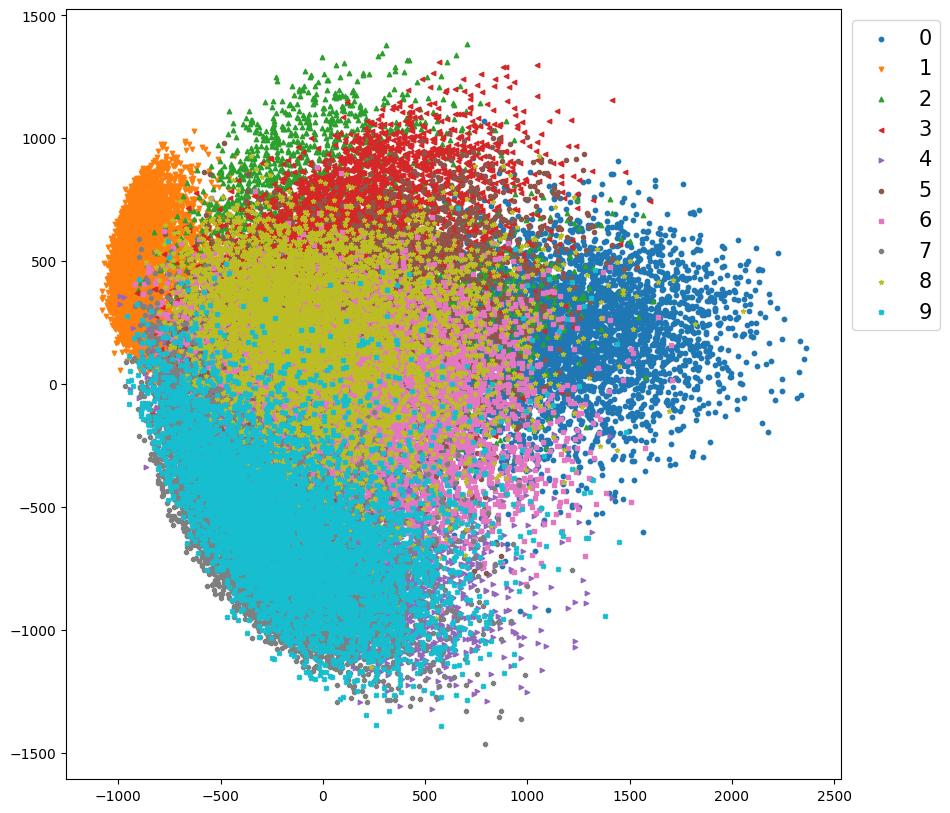

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(X_train)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = Y_train == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

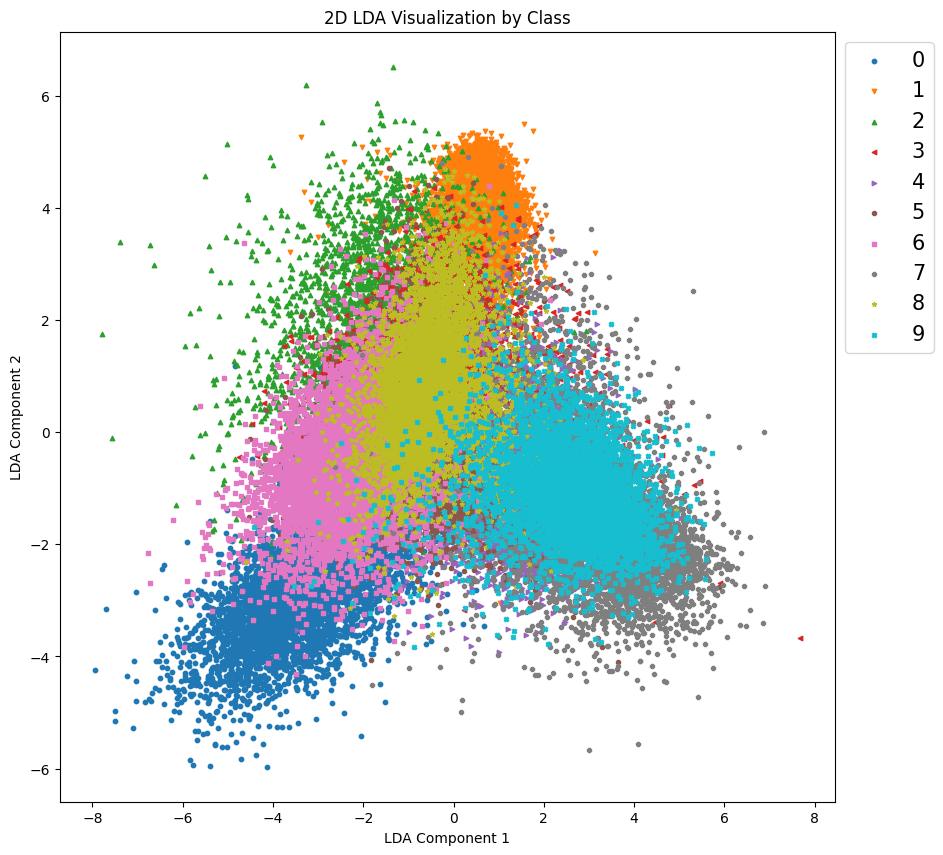

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Initialize LDA with the maximum possible components (num_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the training data
x_lda = lda.fit_transform(X_train, Y_train)

# Define markers for each class
markers = ['o', 'v', '^', '<', '>', '8', 's', 'P', '*', 'X']

# Plot in 2D by class
plt.figure(figsize=(10,10))
for i, marker in enumerate(markers):
    mask = Y_train == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1, marker=marker)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=15)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("2D LDA Visualization by Class")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, Y_train)

Y_pred = knn.predict(X_test_pca)

print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")

Cumulative explained variance: 0.8246
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9748


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=None)

X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_lda, Y_train)

Y_pred = knn.predict(X_test_lda)

print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.94      0.98      0.96      1135
           2       0.92      0.90      0.91      1032
           3       0.88      0.88      0.88      1010
           4       0.89      0.93      0.91       982
           5       0.88      0.84      0.86       892
           6       0.95      0.94      0.95       958
           7       0.92      0.91      0.91      1028
           8       0.88      0.84      0.86       974
           9       0.91      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Accuracy: 0.9105


In [11]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=None)
X_train_lda = lda.fit_transform(X_train_pca, Y_train)
X_test_lda = lda.transform(X_test_pca)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_lda, Y_train)

Y_pred = knn.predict(X_test_lda)
print(f"Classification Report:\n{classification_report(Y_test, Y_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.90      0.91      0.90      1032
           3       0.87      0.88      0.87      1010
           4       0.89      0.93      0.91       982
           5       0.88      0.85      0.86       892
           6       0.95      0.96      0.95       958
           7       0.94      0.91      0.93      1028
           8       0.90      0.84      0.87       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Accuracy: 0.9122


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred1 = knn.predict(X_test)

print(f"Classification Report:\n{classification_report(Y_test, Y_pred1)}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred1):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9688


Check the duration taken for KNN to run with and without PCA

In [ ]:
n_components = 50
knn = KNeighborsClassifier(n_neighbors=3)

pca = PCA(n_components=n_components)
X_red = pca.fit_transform(X_train)
X_red_test = pca.transform(X_test)

t_start = time.time()
knn.fit(X_red, Y_train)
t_end = time.time()

print("Time taken KNN with PCA:", t_end - t_start)
print("KNN score with PCA:", knn.score(X_red_test, Y_test))


Time taken KNN with PCA: 0.01120138168334961
KNN score with PCA: 0.9752


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

t_start = time.time()
knn.fit(X_train, Y_train)
t_end= time.time()
print("Time taken KNN:", t_end-t_start)
print("KNN score:", knn.score(X_test, Y_test))

Time taken KNN: 0.21518349647521973
KNN score: 0.9705


Calculating Accuracy: 100%|██████████| 78/78 [33:10<00:00, 25.52s/it]


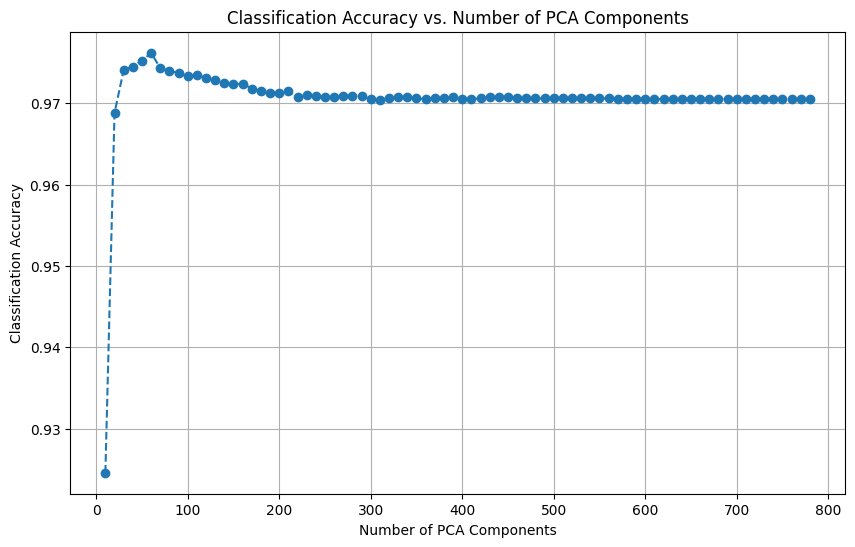

In [ ]:
from tqdm import tqdm

components_range = range(10, 783, 10)
accuracy_scores = []

for n_components in tqdm(components_range, desc="Calculating Accuracy"):

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, Y_train)

    Y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='--')
plt.title('Classification Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.show()

Calculating Error Rate: 100%|██████████| 78/78 [30:02<00:00, 23.11s/it]


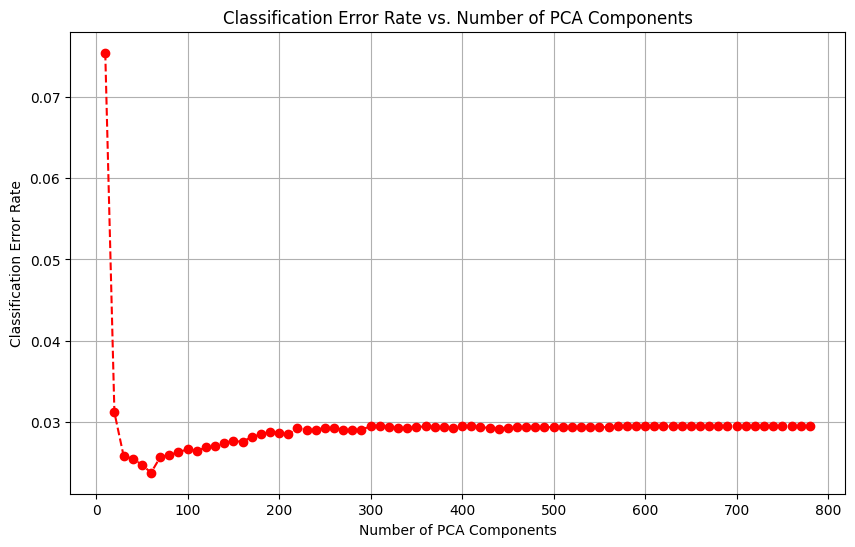

In [ ]:
components_range = range(10, 783, 10)
error_rates = []

for n_components in tqdm(components_range, desc="Calculating Error Rate"):

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, Y_train)

    Y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(Y_test, Y_pred)
    error_rate = 1 - accuracy
    error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(components_range, error_rates, marker='o', linestyle='--', color='r')
plt.title('Classification Error Rate vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Error Rate')
plt.grid(True)
plt.show()


Calculating Accuracy with Early Stopping: 100%|██████████| 9/9 [02:44<00:00, 18.26s/it]


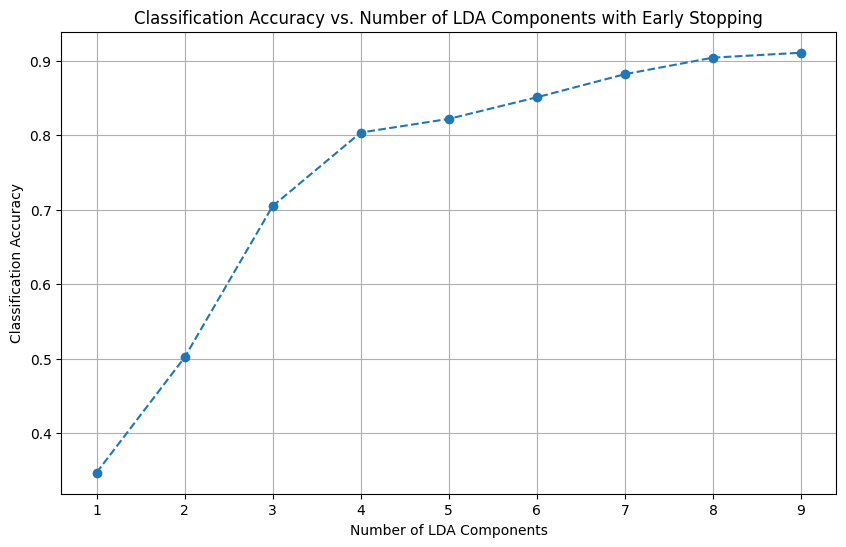

In [10]:
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

num_classes = len(set(Y_train))
components_range = range(1, num_classes)

patience = 5
best_accuracy = 0
accuracy_scores = []
no_improve_count = 0

for n_components in tqdm(components_range, desc="Calculating Accuracy with Early Stopping"):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_train_lda = lda.fit_transform(X_train, Y_train)
    X_test_lda = lda.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_lda, Y_train)
    Y_pred = knn.predict(X_test_lda)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        no_improve_count = 0
    else:
        no_improve_count += 1

    if no_improve_count >= patience:
        print(f"Early stopping triggered at {n_components} components.")
        break

plt.figure(figsize=(10, 6))
plt.plot(components_range[:len(accuracy_scores)], accuracy_scores, marker='o', linestyle='--')
plt.title('Classification Accuracy vs. Number of LDA Components with Early Stopping')
plt.xlabel('Number of LDA Components')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.show()
